# CODSOFT DATA SCIENCE INTERNSHIP

TASK 5 Credit Card Fraud Detection

BATCH - AUGUEST

NAME - PAWAN KUMAR


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
Credit_df = pd.read_csv('creditcard.csv')

In [27]:
Credit_df = Credit_df.sample(n=50000, random_state=1)

In [28]:
Credit_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
196117,131364.0,0.077197,0.482928,-2.234233,-1.309124,2.386570,3.392581,-0.156385,1.353569,-0.047112,...,0.060865,-0.060530,0.379575,0.598853,-0.878618,0.254859,-0.088550,-0.023446,69.90,0
24533,33274.0,-0.958584,1.109086,1.558159,0.878707,1.914559,1.564757,1.300978,0.074098,-1.376977,...,0.155271,0.657607,-0.296222,-1.053362,0.006475,-0.058981,-0.528679,-0.374450,6.55,0
13629,24158.0,-0.992899,1.430204,1.071256,1.363127,0.116315,0.217868,0.208391,0.319128,1.483134,...,-0.258903,-0.104189,-0.100144,-0.369103,-0.068048,-0.266731,0.080402,-0.034571,1.00,0
246673,153276.0,-1.143693,-0.250983,1.013022,-0.671080,1.363438,0.312673,0.786158,-0.089323,-0.272429,...,-0.094134,-0.137349,-0.047086,0.058485,0.825118,0.316019,-0.377194,-0.246404,84.15,0
91842,63649.0,0.555043,-0.099484,-0.102234,-0.624145,1.484364,4.154536,-1.242699,0.286054,0.694670,...,0.649935,-0.578303,0.057823,1.026542,0.440906,0.303285,0.146932,0.172708,17.24,0


In [29]:
Credit_df.shape

(50000, 31)

In [30]:
Credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
Credit_df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
134700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
Credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
Credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,94568.237120,0.009375,-0.006388,0.007932,0.005389,-0.013584,0.002138,-0.012014,-0.000626,0.009799,...,0.003204,0.002161,-0.001578,-0.002866,-0.000264,0.002758,0.000194,-0.003018,88.835696,0.001560
std,47644.749181,1.944718,1.655675,1.496093,1.415263,1.373212,1.326671,1.207344,1.165860,1.094200,...,0.730002,0.724390,0.642273,0.602641,0.519139,0.482751,0.394789,0.300881,255.854804,0.039466
min,0.000000,-46.855047,-63.344698,-31.813586,-5.266509,-42.147898,-23.496714,-26.548144,-33.785407,-8.739670,...,-16.640785,-10.933144,-30.269720,-2.836627,-7.025783,-2.534330,-8.260909,-9.617915,0.000000,0.000000
25%,53707.250000,-0.912235,-0.606529,-0.887455,-0.842316,-0.707377,-0.765034,-0.562158,-0.206860,-0.634059,...,-0.227375,-0.541636,-0.162504,-0.357463,-0.317833,-0.325672,-0.071048,-0.053269,5.900000,0.000000
50%,84531.000000,0.034600,0.058804,0.181288,-0.009739,-0.071339,-0.270534,0.029527,0.023536,-0.041871,...,-0.030649,0.008707,-0.011542,0.038580,0.016487,-0.049156,0.001380,0.010736,22.255000,0.000000
75%,139321.000000,1.319965,0.801407,1.033060,0.748400,0.603720,0.401818,0.558740,0.325839,0.609796,...,0.186562,0.530342,0.148253,0.432802,0.350429,0.246083,0.090069,0.076237,78.000000,0.000000
max,172784.000000,2.411499,17.418649,4.069865,16.715537,34.099309,22.529298,36.677268,19.587773,9.272376,...,22.588989,6.090514,18.946734,3.962197,5.541598,3.155327,11.135740,15.373170,19656.530000,1.000000


In [34]:
Credit_df['Class'].value_counts()

Class
0    49922
1       78
Name: count, dtype: int64

In [35]:
Credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 169876 to 203074
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  float64
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 2

In [37]:
# separating the data for analysis
legit = Credit_df[Credit_df.Class == 0]
fraud = Credit_df[Credit_df.Class == 1]

fraud.Amount.describe()

count      78.000000
mean      171.057821
std       350.603774
min         0.000000
25%         1.000000
50%        14.850000
75%       166.207500
max      2125.870000
Name: Amount, dtype: float64

In [38]:
legit.Amount.describe()

count    49922.000000
mean        88.707229
std        255.663416
min          0.000000
25%          5.940000
50%         22.270000
75%         78.000000
max      19656.530000
Name: Amount, dtype: float64

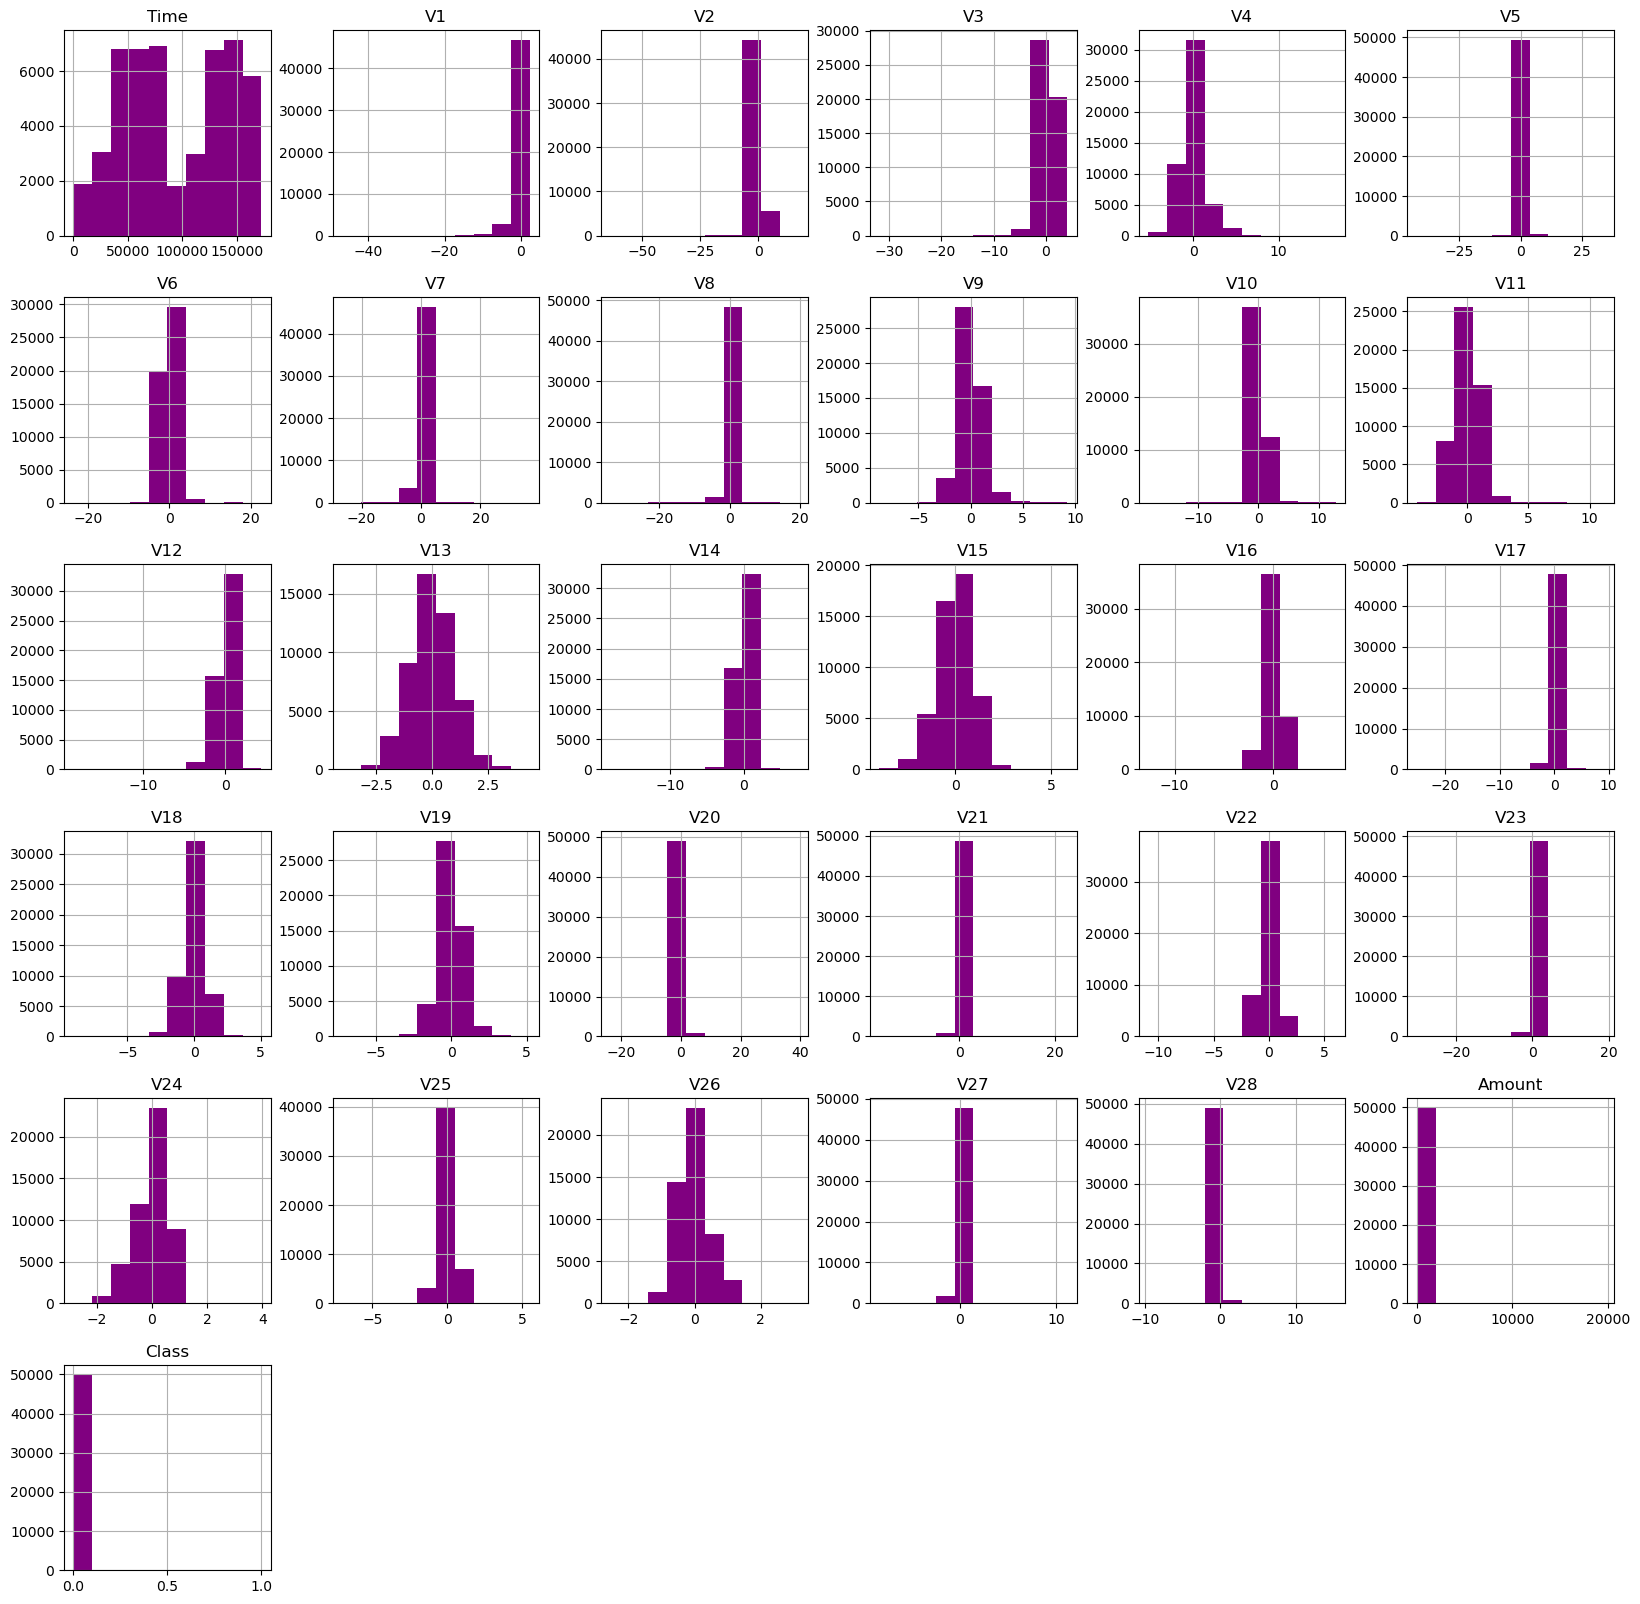

In [39]:
Credit_df.hist(figsize=(20,20),color='Purple')
plt.show()

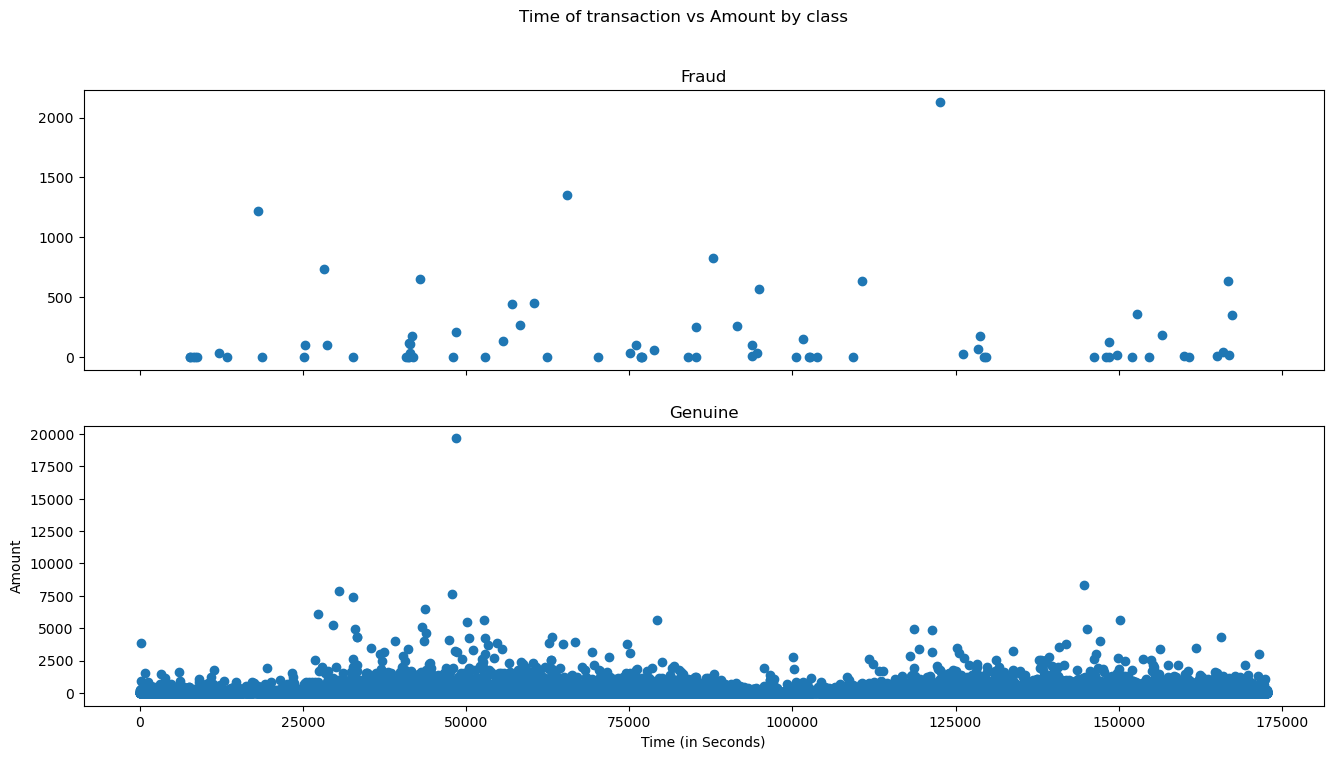

In [40]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [42]:
# compare the values for both transactions
Credit_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94585.511698,0.015132,-0.010802,0.017263,-0.001261,-0.009661,0.004254,-0.005545,-0.002423,0.013179,...,0.002344,0.002207,0.002251,-0.001158,-0.002881,-0.000369,0.002768,-0.000243,-0.003160,88.707229
1,83512.064103,-3.675240,2.818686,-5.964128,4.261630,-2.524286,-1.351753,-4.152047,1.149363,-2.153379,...,0.081850,0.641597,-0.055704,-0.270142,0.006894,0.066830,-0.003693,0.279691,0.088009,171.057821


In [ ]:
#Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
#Concatenating two DataFrames

In [44]:
#Number of Fraudulent Transactions --> 492
legit_sample = legit.sample(n=492)

In [45]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [46]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
157726,110340.0,0.044427,0.828169,-1.211422,0.425973,2.016084,1.225070,0.679013,0.115171,0.517059,...,0.202929,1.143865,-0.116783,-0.930765,-0.871932,0.572777,0.365935,0.281057,24.93,0
265930,162110.0,-1.137154,1.651061,-1.330980,-1.402335,1.275727,-0.962924,1.645691,-0.443032,-0.081810,...,0.220925,0.630612,-0.437310,-1.006904,0.230115,0.139025,-0.768682,-0.061615,25.34,0
43250,41432.0,-1.738299,1.246755,-0.262871,1.240927,-0.698296,-0.208683,-0.438541,1.259278,-0.318051,...,0.070731,-0.164520,-0.094793,-0.490660,-0.162598,-0.316184,-0.408702,-0.148537,33.41,0
208496,137146.0,-0.538121,-1.650464,-0.890441,-2.973592,0.629742,1.037389,-1.284909,0.935594,-1.892332,...,0.312131,0.949465,0.517050,-0.970686,-2.177003,-0.553860,0.306158,0.139517,52.00,0
46988,43022.0,1.174407,-0.237578,0.585989,0.794385,-0.910939,-0.714316,-0.259939,0.037571,0.926596,...,-0.316211,-0.928336,0.088425,0.347267,0.219529,0.291984,-0.044983,0.014706,33.35,0


In [47]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42473,41116.0,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,...,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,3.79,1
184379,126219.0,-1.141559,1.927650,-3.905356,-0.073943,-0.044858,-1.756999,-1.217416,0.364563,-2.770148,...,0.102081,-0.531496,-0.328741,0.393100,0.568435,0.786605,-0.146102,0.076211,25.00,1
234632,148053.0,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1.59,1
143335,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
10690,18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1


In [48]:
new_dataset['Class'].value_counts()

Class
0    492
1     78
Name: count, dtype: int64

In [49]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92669.363821,0.092304,-0.036136,0.045119,0.097156,-0.093065,0.102174,0.007440,0.029738,0.002772,...,-0.011794,0.021123,0.010623,-0.088470,-0.021654,-0.011526,0.033103,-0.005529,-0.000723,108.848089
1,83512.064103,-3.675240,2.818686,-5.964128,4.261630,-2.524286,-1.351753,-4.152047,1.149363,-2.153379,...,0.081850,0.641597,-0.055704,-0.270142,0.006894,0.066830,-0.003693,0.279691,0.088009,171.057821


In [ ]:
#Splitting the data into Features & Targets

In [50]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [51]:
print(X)

            Time         V1        V2         V3        V4        V5  \
157726  110340.0   0.044427  0.828169  -1.211422  0.425973  2.016084   
265930  162110.0  -1.137154  1.651061  -1.330980 -1.402335  1.275727   
43250    41432.0  -1.738299  1.246755  -0.262871  1.240927 -0.698296   
208496  137146.0  -0.538121 -1.650464  -0.890441 -2.973592  0.629742   
46988    43022.0   1.174407 -0.237578   0.585989  0.794385 -0.910939   
...          ...        ...       ...        ...       ...       ...   
42473    41116.0  -3.600544  4.519047  -6.340884  6.214767 -5.829558   
184379  126219.0  -1.141559  1.927650  -3.905356 -0.073943 -0.044858   
234632  148053.0   1.261324  2.726800  -5.435019  5.342759  1.447043   
143335   85285.0  -6.713407  3.921104  -9.746678  5.148263 -5.151563   
10690    18088.0 -12.224021  3.854150 -12.466766  9.648311 -2.726961   

              V6         V7        V8        V9  ...       V20       V21  \
157726  1.225070   0.679013  0.115171  0.517059  ...  0.167

In [52]:
print(Y)

157726    0
265930    0
43250     0
208496    0
46988     0
         ..
42473     1
184379    1
234632    1
143335    1
10690     1
Name: Class, Length: 570, dtype: int64


# Split the data into Training data & Testing Data

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(570, 30) (456, 30) (114, 30)


# Model Training

In [55]:
model = LogisticRegression()

In [56]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [57]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [58]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9671052631578947


In [59]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [60]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.956140350877193
